# Currently using only depth_spread.csv

In [191]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Generate dummy data with 3 features
df = pd.read_csv("depth_spread.csv")

Xdf = df.iloc[:,1:3]
X = Xdf.to_numpy()

### Initial Data Analysis

array([[<AxesSubplot:title={'center':'DOM'}>,
        <AxesSubplot:title={'center':'spreads'}>]], dtype=object)

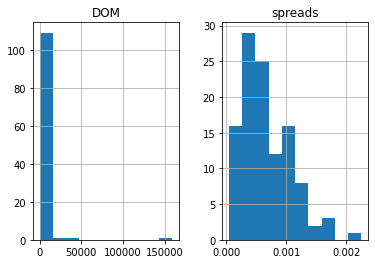

In [204]:
df.hist()

<AxesSubplot:>

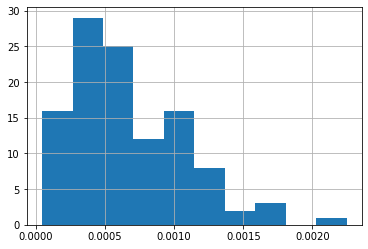

In [205]:
df['spreads'].hist()

<AxesSubplot:>

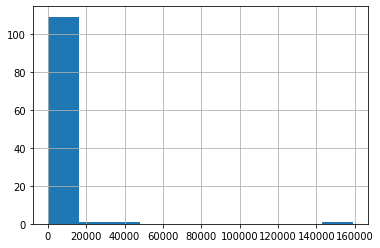

In [206]:
df['DOM'].hist()

In [207]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DOM,112.0,3310.234033,15621.203401,155.853422,395.072400,613.324704,1267.241723,158997.484471
spreads,112.0,0.000670,0.000406,0.000047,0.000359,0.000588,0.000935,0.002246


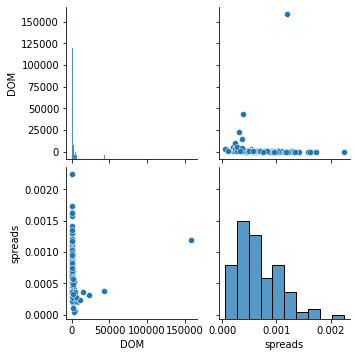

In [208]:
import seaborn as sns

sns.pairplot(df)

### Normalize with Z-score normalization using Sklearn's StandardScaler

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

### Using first 2 principle components for graphing clusters obtained by following algorithms

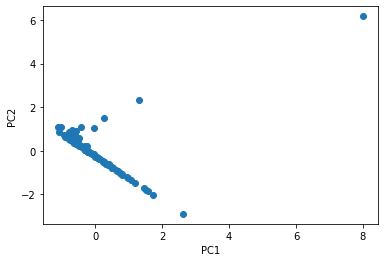

In [211]:
# PCA with 2 components for graphing
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_norm)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## K-means clustering (using elbow method)

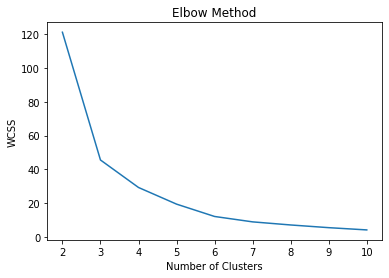

In [212]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [213]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X_norm)
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0])

Estimated number of clusters: 3


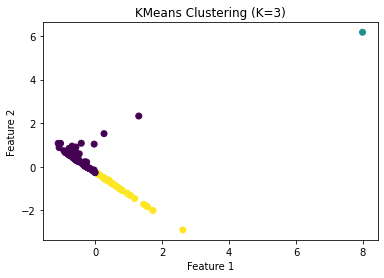

In [214]:
num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering (K={num_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Hierarchical clustering (with dendogram cut)

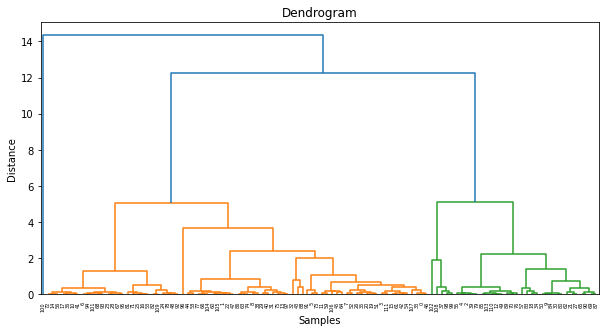

In [215]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(X_norm, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

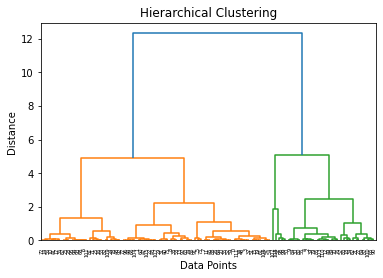

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering with ward linkage
Z = linkage(X_norm, method='ward')

# Plot dendrogram
dendrogram(Z)
plt.title('Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Estimated number of clusters: 3


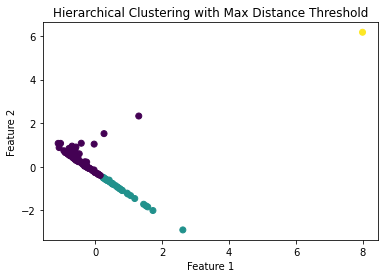

In [216]:
# Estimate number of clusters
max_d = 6 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Max Distance Threshold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [217]:
clusters

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1], dtype=int32)

## Density-based clustering with DBSCAN 

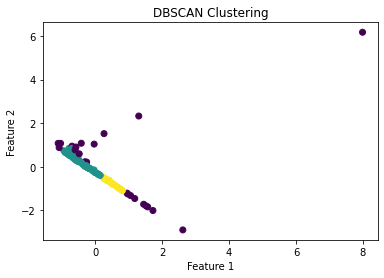

In [229]:
## from sklearn.cluster import DBSCAN

# Density-based clustering with DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
labels = dbscan.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [230]:
labels

array([ 0,  0,  1,  0,  1, -1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0, -1,  0,
       -1,  0,  0, -1,  0,  1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  1,  1,
        0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,
        0,  1,  1,  0,  0, -1,  0,  0,  1,  0,  0,  1,  1,  0,  0, -1,  1,
        1,  0,  1, -1,  1,  1, -1,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,
       -1,  1,  0,  0, -1, -1, -1,  0,  1,  0], dtype=int64)

## GMM clustering (using AIC & BIC)

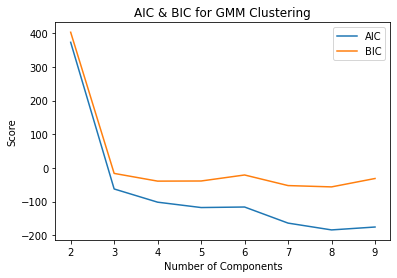

In [231]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_norm) for n in n_components]
plt.plot(n_components, [m.aic(X_norm) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X_norm) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

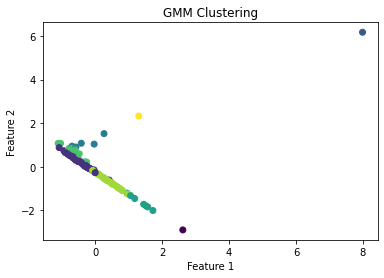

In [232]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [233]:
labels

array([5, 5, 6, 1, 6, 5, 1, 1, 1, 6, 1, 5, 6, 1, 1, 1, 6, 1, 4, 5, 5, 6,
       1, 1, 1, 6, 5, 6, 1, 5, 6, 1, 3, 5, 6, 5, 1, 4, 1, 6, 5, 1, 5, 3,
       5, 3, 5, 1, 1, 6, 6, 5, 1, 6, 1, 6, 1, 4, 5, 5, 1, 1, 6, 1, 3, 6,
       1, 1, 1, 6, 1, 6, 1, 5, 1, 1, 6, 1, 1, 6, 6, 6, 1, 4, 6, 6, 1, 6,
       3, 6, 6, 1, 6, 1, 1, 1, 7, 1, 4, 4, 2, 1, 0, 6, 1, 1, 5, 5, 4, 1,
       6, 1], dtype=int64)